In [253]:
import requests
import os

def search_bike_stations(client_id, client_secret, location):
   
    url = "https://api.foursquare.com/v3/places/search"

    FOURSQUARE_API_KEY = os.environ["FOURSQUARE_API_KEY"]
    headers = {
        "Accept": "application/json",
        "Authorization": FOURSQUARE_API_KEY
    }

    
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "v": "20220101",  # API version
        "near": location,  # Location to search for (e.g., "London")
        "query": "bike station",  # Search query for bike stations
        "radius": 1000,  # Radius in meters
        "limit": 10  # Limiting to 10 results
    }
    response = requests.request("GET", url, headers=headers)
    return response.json()


#print(FOURSQUARE_API_KEY)

# Location to search for (e.g., "London")
location = "London, UK"

# Send a request to Foursquare for bike stations in London
bike_stations_data = search_bike_stations(foursquare_client_id, foursquare_client_secret, location)

print(bike_stations_data)



In [220]:
import requests
import os
import pandas as pd  # Import the pandas package

def search_bike_stations(client_id, client_secret, location):
    url = "https://api.foursquare.com/v3/places/search"
    
    FOURSQUARE_API_KEY = os.environ["FOURSQUARE_API_KEY"]
    
    headers = {
        "Accept": "application/json",
        "Authorization": FOURSQUARE_API_KEY
    }

    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "v": "20220101",  # API version
        "near": location,  # Location to search for (e.g., "London")
        "query": "bike station",  # Search query for bike stations
        "limit": 10  # Limiting to 10 results
    }
    
    response = requests.get(url, headers=headers, params=params)  # Use get() method to include the parameters in the API call
    if response.status_code == 200:
        return response.json()  # Return the JSON response
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        return None

# Assuming foursquare_client_id and foursquare_client_secret are defined
location = "London, UK"
bike_stations_data = search_bike_stations(foursquare_client_id, foursquare_client_secret, location)

# Parse through the response and create a DataFrame
if bike_stations_data:
    # Extract relevant information from the JSON response
    bike_stations = []
    for result in bike_stations_data.get('results', []):  # Use get() method to provide a default value if key is not found
        fsq_id = result.get('fsq_id', 'N/A')
        name = result.get('name', 'N/A')
        categories = result.get('categories', 'N/A')
        address = result.get('address', 'N/A')
        rating = result.get('rating', 'N/A')
        # Extract other relevant information from the result
        
        bike_stations.append({'name': name, 'address': address, 'location': location, 'categories': categories, 'rating': rating})  # Append the extracted information to the list
    # Create a DataFrame from the extracted data
    bike_stations_df = pd.DataFrame(bike_stations)
    print(bike_stations_df)
else:
    print("No data available to create DataFrame")

                                                name address    location  \
0                        Aldwych Underground Station     N/A  London, UK   
1  London St Pancras International Railway Statio...     N/A  London, UK   
2                          citizenM Victoria Station     N/A  London, UK   
3         Machine Cycling Café/Bike Shop and Repairs     N/A  London, UK   
4          London King's Cross Railway Station (KGX)     N/A  London, UK   
5                                      The Bike Shed     N/A  London, UK   
6                                      Bread by Bike     N/A  London, UK   
7                                       On Your Bike     N/A  London, UK   
8                              Waterloo Body Station     N/A  London, UK   
9                Farringdon Station – Elizabeth Line     N/A  London, UK   

                                          categories rating  
0  [{'id': 16000, 'name': 'Landmarks and Outdoors...    N/A  
1  [{'id': 19047, 'name': 'Rail Station

In [221]:
#A request to Yelp with a small radius (1000m) for all the bike stations in London.
import requests
import os

def search_yelp_nearby(api_key, coordinates):
    url = "https://api.yelp.com/v3/businesses/search"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }
    params = {
        "latitude": coordinates.split(',')[0],  # Extracting latitude from coordinates
        "longitude": coordinates.split(',')[1],  # Extracting longitude from coordinates
        "radius": 1000,  # Radius in meters
        "categories": "restaurants,bars",  # Search for restaurants and bars
        "limit": 1  # Limiting to 1 result
    }
    response = requests.get(url, headers=headers, params=params)
    return response.json()

# Example coordinates of a bike station in London
london_bike_station_coordinates = "51.5074,-0.1278"  # Latitude and longitude of central London

# Replace YOUR_YELP_API_KEY with your actual Yelp API key
yelp_api_key = YELP_API_KEY

# Send a request to Yelp for nearby businesses
yelp_nearby_data = search_yelp_nearby(yelp_api_key, london_bike_station_coordinates)

# Print the response
print(yelp_nearby_data)


{'businesses': [{'id': 'oK_SLmmAVQg3meguh7LrIA', 'alias': 'dishoom-london', 'name': 'Dishoom', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/bO9vDl04b81z4mjnMgFEOg/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/dishoom-london?adjust_creative=3Hby0XniStF519qjv3IVIg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=3Hby0XniStF519qjv3IVIg', 'review_count': 2555, 'categories': [{'alias': 'indpak', 'title': 'Indian'}], 'rating': 4.5, 'coordinates': {'latitude': 51.512447030091, 'longitude': -0.1269579217873}, 'transactions': [], 'price': '££', 'location': {'address1': "12 Upper Saint Martin's Lane", 'address2': '', 'address3': '', 'city': 'London', 'zip_code': 'WC2H 9FB', 'country': 'GB', 'state': 'XGL', 'display_address': ["12 Upper Saint Martin's Lane", 'London WC2H 9FB', 'United Kingdom']}, 'phone': '+442074209320', 'display_phone': '+44 20 7420 9320', 'distance': 564.2211579994282, 'attributes': {'business_temp_closed': None, 'menu_url': 'http:/

In [222]:
#Parse through the response to get the Points of Interest such as restaurants, bars
#details include ratings, name, location and results are put into a DataFrame
import pandas as pd
import requests
import os

def search_yelp_nearby(api_key, coordinates):
    url = "https://api.yelp.com/v3/businesses/search"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }
    params = {
        "latitude": coordinates.split(',')[0],  # Extracting latitude from coordinates
        "longitude": coordinates.split(',')[1],  # Extracting longitude from coordinates
        "radius": 1000,  # Radius in meters
        "categories": "restaurants,bars",  # Search for restaurants and bars
        "limit": 10  # Limiting to 10 results
    }
    response = requests.get(url, headers=headers, params=params)
    return response.json()

# Example coordinates of a bike station in London
london_bike_station_coordinates = "51.5074,-0.1278"  # Latitude and longitude of central London

# Replace YOUR_YELP_API_KEY with your actual Yelp API key
yelp_api_key = YELP_API_KEY

# Send a request to Yelp for nearby businesses
yelp_nearby_data = search_yelp_nearby(yelp_api_key, london_bike_station_coordinates)

# Extract relevant information from the response
businesses = yelp_nearby_data['businesses']
business_details = []
for business in businesses:
    name = business['name']
    category = ', '.join([cat['title'] for cat in business['categories']])
    address = business['location']['address1'] if 'address1' in business['location'] else 'N/A'
    rating = business['rating'] if 'rating' in business else 'N/A'
    location = f"{business['coordinates']['latitude']}, {business['coordinates']['longitude']}"
    business_details.append({'Name': name, 'Category': category, 'Address': address, 'Rating': rating, 'Location': location})

# Create a DataFrame
yelp_df = pd.DataFrame(business_details)

# Print the DataFrame
print(yelp_df)


                    Name                             Category  \
0                Dishoom                               Indian   
1          The Admiralty                                 Pubs   
2              Barrafina                              Spanish   
3             Steak & Co                 Steakhouses, British   
4              Flat Iron                          Steakhouses   
5           The Northall                      Modern European   
6  Hawksmoor Seven Dials  British, Steakhouses, Cocktail Bars   
7             Wild Honey              Modern European, French   
8                 Wahaca                              Mexican   
9              Flat Iron                          Steakhouses   

                        Address  Rating                              Location  
0  12 Upper Saint Martin's Lane     4.5     51.512447030091, -0.1269579217873  
1           66 Trafalgar Square     3.9                  51.507241, -0.128521  
2            10 Adelaide Street     4.6     

In [223]:
import requests
import os

def search_top_restaurants_yelp(api_key, location):
    url = "https://api.yelp.com/v3/businesses/search"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }
    params = {
        "location": location,
        "categories": "restaurants",
        "sort_by": "rating",
        "limit": 10
    }
    response = requests.get(url, headers=headers, params=params)
    return response.json()

# Replace YOUR_YELP_API_KEY with your actual Yelp API key
yelp_api_key = YELP_API_KEY

# Location to search for (e.g., "London")
location = "London, UK"

# Get the top 10 restaurants according to their rating from Yelp
top_restaurants_yelp = search_top_restaurants_yelp(yelp_api_key, location)

# Print the top 10 restaurants
print("\nTop 10 Restaurants from Yelp:")
for idx, restaurant in enumerate(top_restaurants_yelp['businesses']):
    print(f"{idx + 1}. {restaurant['name']}, Rating: {restaurant.get('rating', 'N/A')}")



Top 10 Restaurants from Yelp:
1. African Volcano, Rating: 5.0
2. Nepa Coffee & Food, Rating: 5.0
3. Rainforest Creations, Rating: 5.0
4. Skewers, Rating: 5.0
5. Holloway Best Kebab, Rating: 5.0
6. The Black Cab Coffee Co, Rating: 5.0
7. Camberwell Arms, Rating: 5.0
8. Blue Orchid Chinese Restaurant, Rating: 5.0
9. Oi Vita Pizzeria, Rating: 5.0
10. Chokhi Dhani, Rating: 5.0


In [224]:
import requests
import os

def search_top_restaurants_foursquare(client_id, client_secret, location):
    url = "https://api.foursquare.com/v3/places/search"
    params = {
        "client_id": client_id,
        "client_secret": client_secret,
        "v": "20220101",
        "near": location,
        "categoryId": "4d4b7105d754a06374d81259",  # Category ID for food
        "limit": 10,
        "sortBy": "rating"
    }
    response = requests.get(url, params=params)
    return response.json()

# Replace YOUR_FOURSQUARE_CLIENT_ID and YOUR_FOURSQUARE_CLIENT_SECRET with your actual Foursquare API credentials
foursquare_client_id = "FOURSQUARE_API_KEY"
foursquare_client_secret = "FOURSQUARE_API_KEY"

# Location to search for (e.g., "London")
location = "London, UK"

# Get the top 10 restaurants according to their rating from Foursquare
top_restaurants_foursquare = search_top_restaurants_foursquare(foursquare_client_id, foursquare_client_secret, location)




In [226]:
def search_bike_stations(location):
    FOURSQUARE_API_KEY = os.getenv("FOURSQUARE_API_KEY")
    if not FOURSQUARE_API_KEY:
        print("FOURSQUARE_API_KEY is not set. Please check your environment variables.")
        return None

    url = "https://api.foursquare.com/v3/places/search"

    headers = {
        "Accept": "application/json",
        "Authorization": FOURSQUARE_API_KEY
    }

    params = {
        "v": "20220101",
        "near": location,
        "query": "bike station",
        # "radius": 1000,  # Commented out to test without radius
        "limit": 10
    }

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data: {response.status_code}")
        print("Error message:", response.text)
        return None

location = "London, UK"
bike_stations_data = search_bike_stations(location)
if bike_stations_data:
    print("Data retrieved successfully.")
else:
    print("Failed to retrieve bike stations data.")

Data retrieved successfully.


In [227]:
from IPython.display import JSON #for nice JSON (or dict) display in JupyterLab (not currently supported in Jupyter Notebook)

In [228]:
JSON(bike_stations_data)

<IPython.core.display.JSON object>

In [229]:
bike_stations_data['results'][0]

{'fsq_id': '4c222b9d497cb713c9e46cd8',
 'categories': [{'id': 16000,
   'name': 'Landmarks and Outdoors',
   'short_name': 'Landmarks and Outdoors',
   'plural_name': 'Landmarks and Outdoors',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/default_',
    'suffix': '.png'}}],
 'chains': [],
 'closed_bucket': 'VeryLikelyOpen',
 'distance': 791,
 'geocodes': {'main': {'latitude': 51.51210783292268,
   'longitude': -0.11583924293518065}},
 'link': '/v3/places/4c222b9d497cb713c9e46cd8',
 'location': {'admin_region': 'England',
  'country': 'GB',
  'cross_street': 'at Surrey St',
  'formatted_address': 'at Surrey St, London, Greater London, WC2R 2LS',
  'locality': 'London',
  'post_town': 'London',
  'postcode': 'WC2R 2LS',
  'region': 'Greater London'},
 'name': 'Aldwych Underground Station',
 'related_places': {},
 'timezone': 'Europe/London'}

In [231]:
# Assuming bike_stations_data['results'] is a list of POIs
for poi_details in bike_stations_data['results']:
    # Extracting name
    poi_name = poi_details['name']
    
    # Extracting location
    poi_location = poi_details['location']
    
    # Extracting categories
    categories = poi_details.get('categories', [])
    category_names = [category['name'] for category in categories]
    
    # Extracting other details as needed
    formatted_address = poi_location.get('formatted_address', 'N/A')

    # Printing or using the extracted details
    print("Name:", poi_name)
    print("Location:", formatted_address)
    print("Categories:", ', '.join(category_names))
    print("\n")


Name: Aldwych Underground Station
Location: at Surrey St, London, Greater London, WC2R 2LS
Categories: Landmarks and Outdoors


Name: London St Pancras International Railway Station (STP)
Location: Pancras Rd (Euston Rd), London, Greater London, NW1 2QP
Categories: Rail Station


Name: citizenM Victoria Station
Location: 292 Vauxhall Bridge Rd, Victoria, Greater London, SW1V 1AE
Categories: Hotel


Name: Machine Cycling Café/Bike Shop and Repairs
Location: 97 Tower Bridge Rd, London, Greater London, SE1 4TW
Categories: Bicycle Store


Name: London King's Cross Railway Station (KGX)
Location: Euston Rd (York Way), London, Greater London, N1C 4TB
Categories: Rail Station


Name: The Bike Shed
Location: 384 Old St, London, Greater London, EC1V 9LT
Categories: Bar, Café, Restaurant


Name: Bread by Bike
Location: 30 Brecknock Rd, Greater London, N7 0DD
Categories: Bakery, Coffee Shop, Restaurant


Name: On Your Bike
Location: The Vaults, Montague Close, London, Greater London, SE1 9DA
Cate

In [232]:
print(type(bike_stations_data))
if isinstance(bike_stations_data, dict):
    print(bike_stations_data.keys())

<class 'dict'>
dict_keys(['results', 'context'])


In [ ]:
import pandas as pd

# Create empty lists to store extracted details
names = []
locations = []
categories_list = []

# Iterate over each item in bike_stations_data
for poi_details in bike_stations_data:
    # Extracting name
    poi_name = poi_details['name']
    names.append(poi_name)
    
    # Extracting location
    poi_location = poi_details['location']
    formatted_address = poi_location.get('formatted_address', 'N/A')
    locations.append(formatted_address)
    
    # Extracting categories
    categories = poi_details.get('categories', [])
    category_names = ', '.join([category['name'] for category in categories])
    categories_list.append(category_names)

# Create a DataFrame
df = pd.DataFrame({
    'Name': names,
    'Location': locations,
    'Categories': categories_list
})

# Display the DataFrame
print(df)


In [ ]:
# Assuming you have a list of dictionaries after extraction
data_for_df = []
for poi_details in bike_stations_data:
    # Extract your details here, similar to what you've done
    data_point = {
        "Name": poi_details['name'],
        "Location": poi_details['location'].get('formatted_address', 'N/A'),
        "Categories": ', '.join([category['name'] for category in poi_details.get('categories', [])])
    }
    data_for_df.append(data_point)

# Before converting to DataFrame, print a few entries to examine
print(data_for_df[:5])

In [ ]:
# Debugging: Print the first few elements' structure and contents
for poi_details in bike_stations_data[:5]:  # Adjust slice as needed
    print(poi_details)  # See the actual structure and available data

In [ ]:
data_for_df = []

for poi_details in bike_stations_data:
    # Start with a very basic extraction to ensure some data is captured
    data_point = {
        "Name": poi_details.get('name', 'N/A')  # Use 'N/A' for missing names
    }
    data_for_df.append(data_point)

# Check if this minimal data shows up
print(data_for_df[:5])

In [ ]:
print(len(names), len(locations), len(categories_list))  # Check if lists are populated
print(names[:5], locations[:5], categories_list[:5])  # Preview the first few elements

In [ ]:
print(bike_stations_data[:5])  # Print the first 5 entries to check their structure

In [ ]:
for poi_details in bike_stations_data:
    assert 'name' in poi_details, "Name key missing"
    assert 'location' in poi_details, "Location key missing"
    assert 'categories' in poi_details, "Categories key missing"
    # If the above assertions pass, it confirms the expected keys are present.

In [ ]:
for poi_details in bike_stations_data:
    # Example of safe access with .get()
    poi_name = poi_details.get('name', 'N/A')

In [ ]:
for poi_details in bike_stations_data:
    print("Processing an item...")  # This should print as many times as there are items

In [ ]:
print(len(bike_stations_data))
print(bike_stations_data[:5])

In [ ]:
print(bike_stations_data)

In [ ]:
print(bike_stations_df)

In [ ]:
# Assuming bike_stations_df and yelp_df are pandas DataFrames
# Printing bike_stations_df
print("Bike Stations DataFrame:")
print(bike_stations_df)

# Printing yelp_df
print("\nYelp DataFrame:")
print(yelp_df)


In [ ]:
#Parse through the response to get the Points of Interest such as restaurants, bars
#details include ratings, name, location and results are put into a DataFrame
import pandas as pd
import requests
import os

def search_yelp_nearby(api_key, coordinates):
    url = "https://api.yelp.com/v3/businesses/search"
    headers = {
        "Authorization": f"Bearer {api_key}"
    }
    params = {
        "latitude": coordinates.split(',')[0],  # Extracting latitude from coordinates
        "longitude": coordinates.split(',')[1],  # Extracting longitude from coordinates
        "radius": 1000,  # Radius in meters
        "categories": "restaurants,bars",  # Search for restaurants and bars
        "limit": 10  # Limiting to 10 results
    }
    response = requests.get(url, headers=headers, params=params)
    return response.json()

# Example coordinates of a bike station in London
london_bike_station_coordinates = "51.5074,-0.1278"  # Latitude and longitude of central London

# Replace YOUR_YELP_API_KEY with your actual Yelp API key
yelp_api_key = "DBBivZRzCVjU0QHAxc2W91b81RojI9BLt5g2Xs_UtxJKiHpCs-0umJUGdEg9o9yECUxxyDF4Xe37er7SNHv6HgsW_27Yn-Rn4bXbft-KXqPmDzlcLUSLo4maGog1ZnYx"

# Send a request to Yelp for nearby businesses
yelp_nearby_data = search_yelp_nearby(yelp_api_key, london_bike_station_coordinates)

# Extract relevant information from the response
businesses = yelp_nearby_data['businesses']
business_details = []
for business in businesses:
    name = business['name']
    category = ', '.join([cat['title'] for cat in business['categories']])
    address = business['location']['address1'] if 'address1' in business['location'] else 'N/A'
    rating = business['rating'] if 'rating' in business else 'N/A'
    location = f"{business['coordinates']['latitude']}, {business['coordinates']['longitude']}"
    id = business['id']
    business_details.append({'Name': name, 'Category': category, 'Address': address, 'Rating': rating, 'Location': location, 'id':id})

# Create a DataFrame
yelp_df = pd.DataFrame(business_details)

# Print the DataFrame
print(yelp_df)

In [ ]:
# Assuming bike_stations_df and yelp_df are pandas DataFrames

# Concatenate the DataFrames vertically
combined_df = pd.concat([bike_stations_df, yelp_df])

# Print the combined DataFrame
print("Combined DataFrame:")
print(combined_df)


In [ ]:
# Assuming bike_stations_df and yelp_df are pandas DataFrames

# Create a new column in each DataFrame with the same constant value
bike_stations_df['key'] = 1
yelp_df['key'] = 1

# Perform the Cartesian product
joined_df = pd.merge(bike_stations_df, yelp_df, on='key', how='outer')

# Drop the key column
joined_df.drop('key', axis=1, inplace=True)

# Print the joined DataFrame
print("Joined DataFrame:")
print(joined_df)


In [ ]:
# Assuming bike_stations_df and yelp_df are pandas DataFrames

# Merge on the index of bike_stations_df and yelp_df
joined_df = pd.merge(bike_stations_df, yelp_df, left_index=True, right_index=True, how='inner')

# Print the joined DataFrame
print("Joined DataFrame:")
print(joined_df)


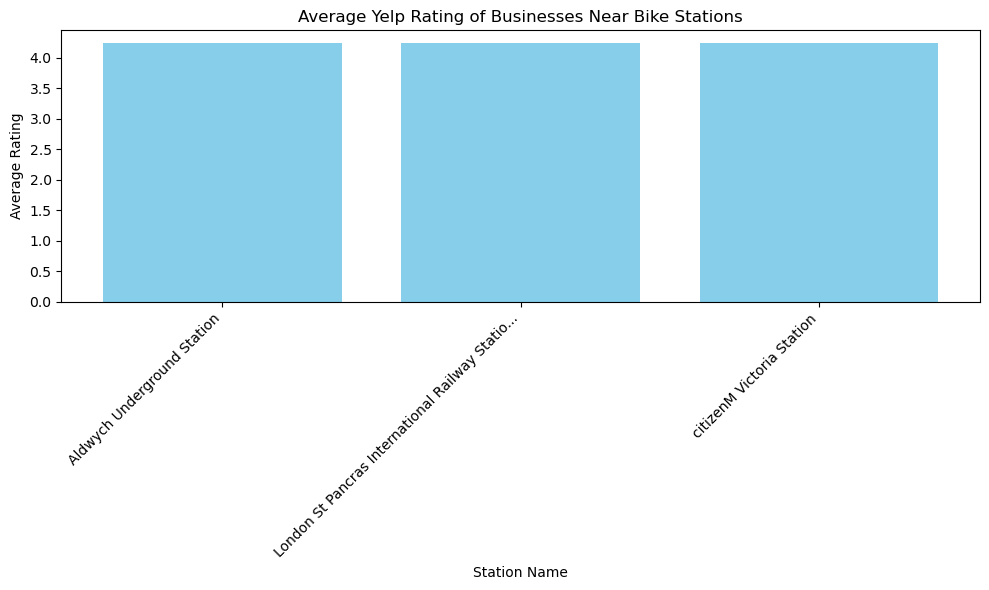

In [243]:
import matplotlib.pyplot as plt

# Grouping by station and calculating average rating
station_avg_rating = joined_df.groupby('station_name')['rating'].mean().reset_index()

# Sorting by average rating
station_avg_rating_sorted = station_avg_rating.sort_values(by='rating', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(station_avg_rating_sorted['station_name'], station_avg_rating_sorted['rating'], color='skyblue')
plt.xlabel('Station Name')
plt.ylabel('Average Rating')
plt.title('Average Yelp Rating of Businesses Near Bike Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
joined_df = pd.read_csv('joined_df.csv')


In [ ]:
print("Summary Statistics:")
print(joined_df.describe())


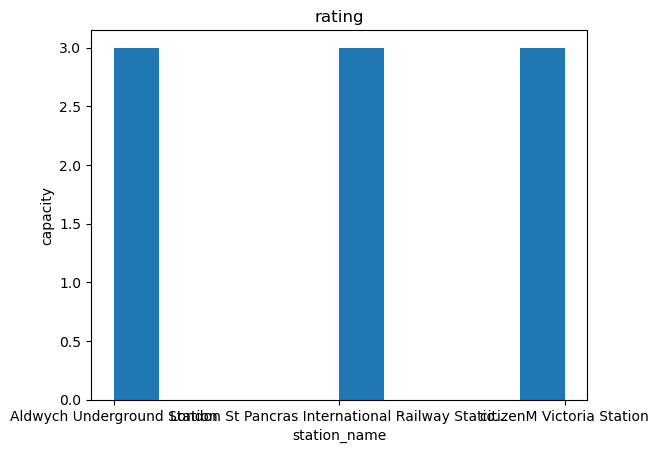

In [245]:
plt.hist(joined_df['station_name'])
plt.xlabel('station_name')
plt.ylabel('capacity')
plt.title('rating')
plt.show()



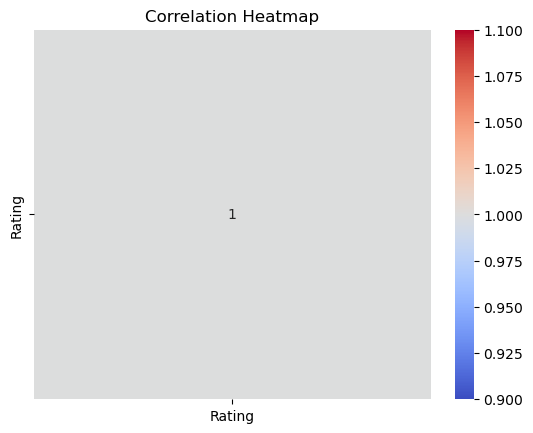

In [242]:
# Selecting only numerical columns
numerical_df = yelp_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


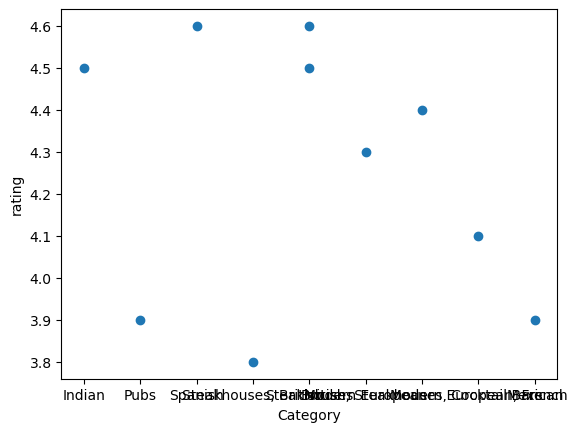

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


yelp_df = yelp_df


plt.scatter(yelp_df['Category'], yelp_df['Rating'])
plt.xlabel('Category')
plt.ylabel('rating')
plt.show()


In [239]:
# Print the column names of yelp_df
print(yelp_df.columns)


Index(['Name', 'Category', 'Address', 'Rating', 'Location'], dtype='object')


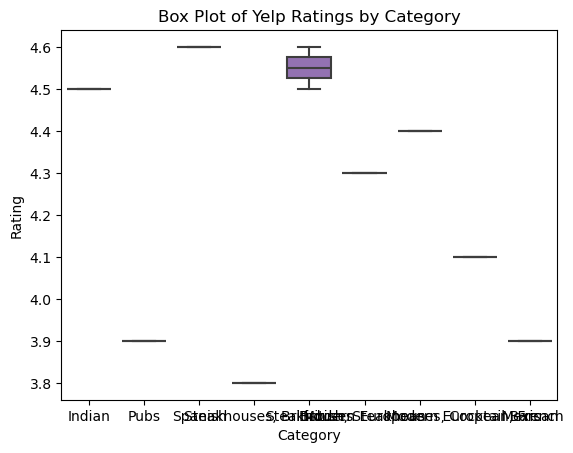

In [252]:
import seaborn as sns

# Assuming yelp_df is your DataFrame
sns.boxplot(x='Category', y='Rating', data=yelp_df)  # Use 'rating' instead of 'Rating'
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Box Plot of Yelp Ratings by Category')
plt.show()


C:\Users\Ayiwoma\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


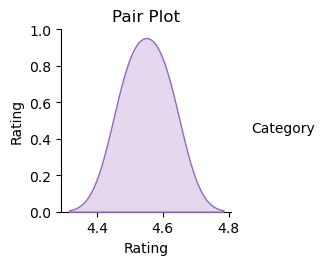

In [238]:
sns.pairplot(yelp_df, hue='Category')
plt.title('Pair Plot')
plt.show()


In [ ]:
import sqlite3

# Connect to the SQLite database (creates the database file if it doesn't exist)
conn = sqlite3.connect('joined_df.db')

# Save the DataFrame to the database
joined_df.to_sql('joined_data', conn, if_exists='replace', index=False)

# Commit the changes and close the connection
conn.commit()
conn.close()

print("DataFrame saved to SQLite database.")


In [236]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('joined_df.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Execute a SELECT query to retrieve all records from the 'joined_data' table
cursor.execute("SELECT * FROM joined_data")

# Fetch all records
records = cursor.fetchall()

# Print the records
for record in records:
    print(record)

# Close the cursor and the connection
cursor.close()
conn.close()


(101, 'Aldwych Underground Station', 20, 'Dishoom', 'Indian', 4.5)
(101, 'Aldwych Underground Station', 20, 'Barrafina', 'British, Steakhouses, Cocktail Bars', 4.4)
(101, 'Aldwych Underground Station', 20, 'The Admiralty', 'Steakhouses, British', 3.8)
(102, 'London St Pancras International Railway Statio...', 30, 'Dishoom', 'Indian', 4.5)
(102, 'London St Pancras International Railway Statio...', 30, 'Barrafina', 'British, Steakhouses, Cocktail Bars', 4.4)
(102, 'London St Pancras International Railway Statio...', 30, 'The Admiralty', 'Steakhouses, British', 3.8)
(103, 'citizenM Victoria Station', 25, 'Dishoom', 'Indian', 4.5)
(103, 'citizenM Victoria Station', 25, 'Barrafina', 'British, Steakhouses, Cocktail Bars', 4.4)
(103, 'citizenM Victoria Station', 25, 'The Admiralty', 'Steakhouses, British', 3.8)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'joined_df' is your DataFrame with features and target variable

# Step 1: Data Preprocessing
# Example: Handling missing values (replace NaN with mean)
joined_df.fillna(joined_df.mean(), inplace=True)

# Splitting the data into features (X) and target variable (y)
X = joined_df.drop('rating', axis=1)  # Replace 'target_column' with the actual name of your target column
y = joined_df['category']

# Step 2: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection
model = LinearRegression()

# Step 4: Training the Model
model.fit(X_train, y_train)

# Step 5: Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Step 6: Prediction (if needed)
# new_data = ...  # Prepare new data for prediction
# prediction = model.predict(new_data)


In [ ]:
# Step 1: Data Preprocessing
# Example: Handling missing values for numeric columns (replace NaN with mean)
numeric_df = joined_df.select_dtypes(include=['float64', 'int64'])
numeric_df.fillna(numeric_df.mean(), inplace=True)

# Merge the processed numeric columns back with non-numeric columns
processed_df = pd.concat([numeric_df, joined_df.select_dtypes(exclude=['float64', 'int64'])], axis=1)


In [ ]:
print(processed_df)

In [ ]:
# Assuming 'joined_df' is your DataFrame with features and target variable

# Splitting the data into features (X) and target variable (y)
X = joined_df.drop('Category', axis=1)  # Replace 'target_column' with the actual name of your target column
y = joined_df['rating']


In [ ]:
# Assuming 'X_train' is your DataFrame containing features

# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Now, you can proceed to build the regression model using X_train_encoded


In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [234]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume 'joined_df' is your DataFrame containing features and target variable

# Separate features and target variable
X = joined_df.drop('Category', axis=1)
y = joined_df['rating']

# Define columns with different data types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regression', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 3.944304526105059e-31
R-squared Score: 0.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train.dtypes)



In [ ]:
# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['station_name', 'Name'])

# Now, check the data types again
print(X_train_encoded.dtypes)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'joined_df' is your DataFrame with features and target variable
# Separate features and target variable
X = joined_df.drop('rating', axis=1)
y = joined_df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the iris dataset (example dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Print coefficients of the logistic regression model
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:")
print(coefficients)
print("Intercept:")
print(intercept)


In [ ]:
# Assume you have a trained regression model called 'regression_model'
# and test data called 'X_test'

# Step 1: Define Classes
class_threshold = 7  # Example threshold value

# Step 2: Predict Continuous Values
predicted_values = regression_model.predict(X_test)

# Step 3: Convert Predictions to Class Labels
predicted_classes = [1 if val >= class_threshold else 0 for val in predicted_values]

# Step 4: Evaluate the Classification Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'y_test' contains the true class labels
accuracy = accuracy_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)
class_report = classification_report(y_test, predicted_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Step 5: Adjust Threshold if Necessary and Repeat Steps 2-4
